In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:

df = pd.read_csv("pizza_sales.csv")

df.head()


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


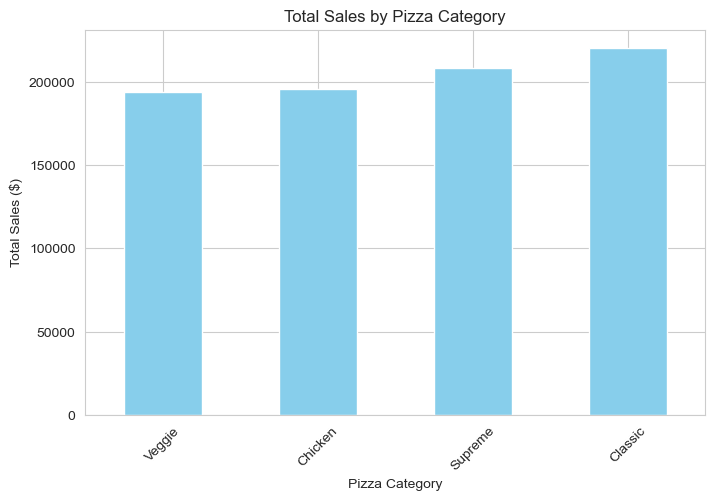

In [8]:
# Set style
sns.set_style("whitegrid")

# Group sales by pizza category
category_sales = df.groupby("pizza_category")["total_price"].sum().sort_values()

# Plot
plt.figure(figsize=(8, 5))
category_sales.plot(kind="bar", color="skyblue")
plt.title("Total Sales by Pizza Category")
plt.ylabel("Total Sales ($)")
plt.xlabel("Pizza Category")
plt.xticks(rotation=45)
plt.show()


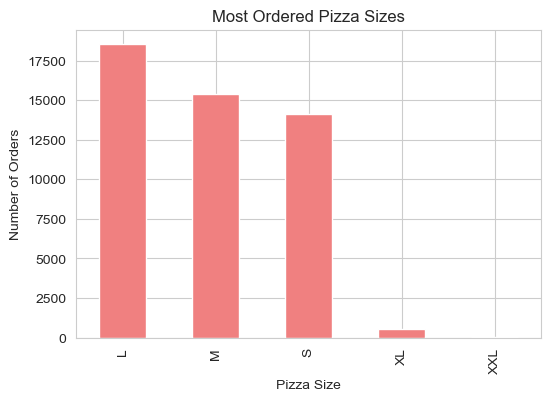

In [10]:
# Count orders by pizza size
size_counts = df["pizza_size"].value_counts()

# Plot
plt.figure(figsize=(6, 4))
size_counts.plot(kind="bar", color="lightcoral")
plt.title("Most Ordered Pizza Sizes")
plt.ylabel("Number of Orders")
plt.xlabel("Pizza Size")
plt.show()


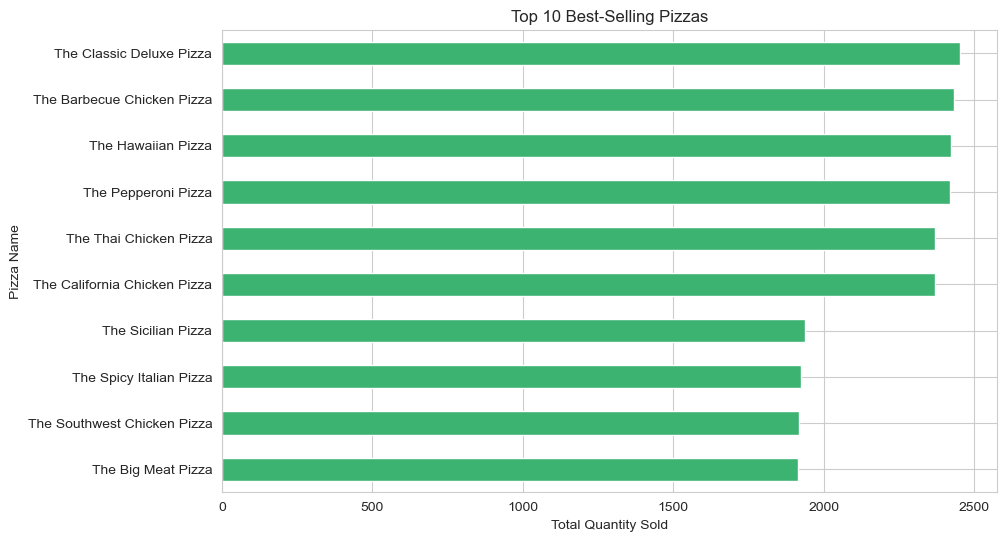

In [12]:
# Group by pizza name and sum quantities
top_pizzas = df.groupby("pizza_name")["quantity"].sum().nlargest(10)

# Plot
plt.figure(figsize=(10, 6))
top_pizzas.plot(kind="barh", color="mediumseagreen")
plt.title("Top 10 Best-Selling Pizzas")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Pizza Name")
plt.gca().invert_yaxis()
plt.show()


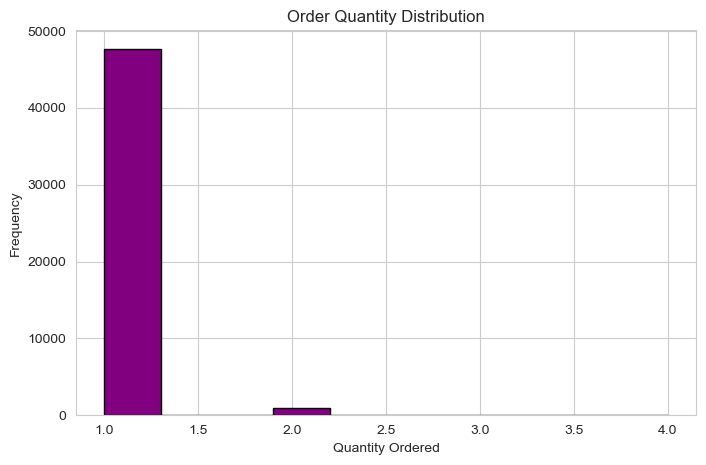

In [14]:
if "quantity" in df.columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df["quantity"], bins=10, color="purple", edgecolor="black")
    plt.title("Order Quantity Distribution")
    plt.xlabel("Quantity Ordered")
    plt.ylabel("Frequency")
    plt.show()

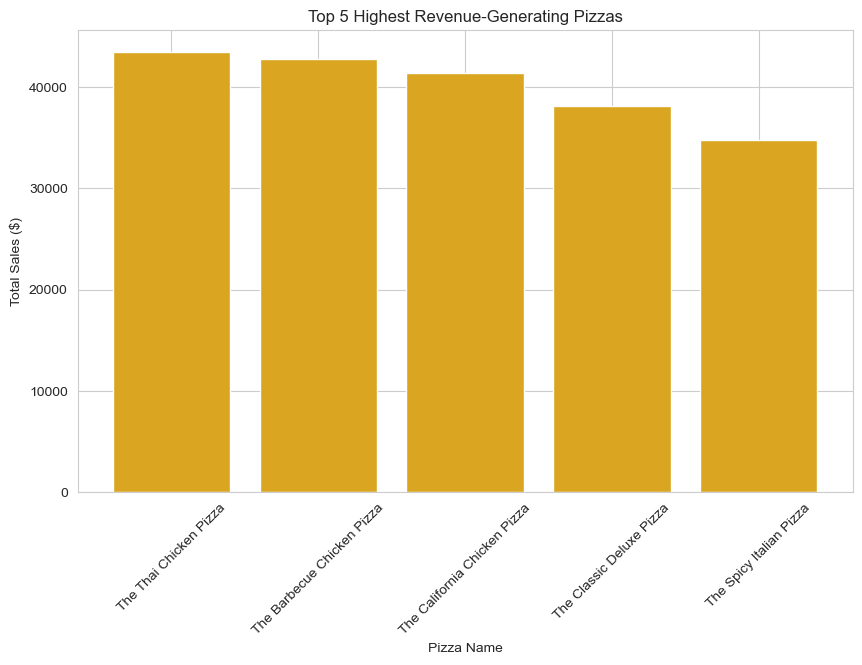

In [16]:
if "pizza_name" in df.columns and "total_price" in df.columns:
    top_revenue_pizzas = df.groupby("pizza_name")["total_price"].sum().nlargest(5)
    plt.figure(figsize=(10, 6))
    plt.bar(top_revenue_pizzas.index, top_revenue_pizzas.values, color="goldenrod")
    plt.title("Top 5 Highest Revenue-Generating Pizzas")
    plt.xlabel("Pizza Name")
    plt.ylabel("Total Sales ($)")
    plt.xticks(rotation=45)
    plt.show()

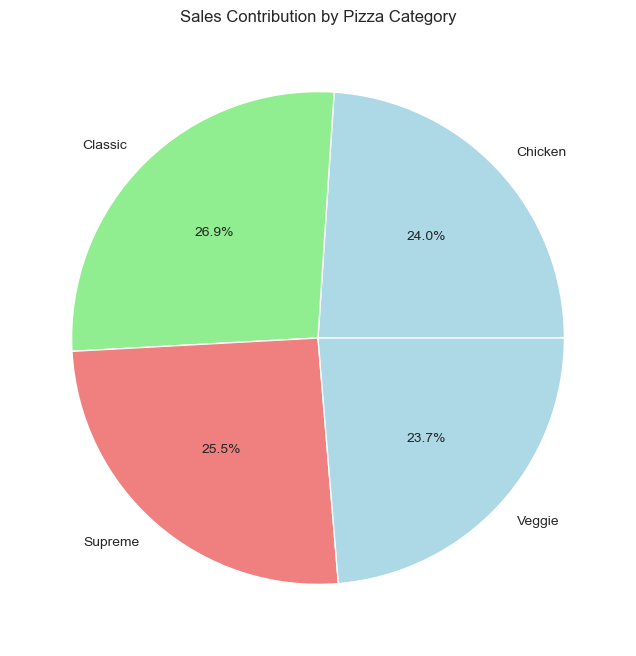

In [18]:
# 2. Sales Contribution by Pizza Type (Pie Chart)
if "pizza_category" in df.columns and "total_price" in df.columns:
    pizza_category_sales = df.groupby("pizza_category")["total_price"].sum()
    plt.figure(figsize=(8, 8))
    plt.pie(pizza_category_sales, labels=pizza_category_sales.index, autopct="%1.1f%%", colors=["lightblue", "lightgreen", "lightcoral"])
    plt.title("Sales Contribution by Pizza Category")
    plt.show()

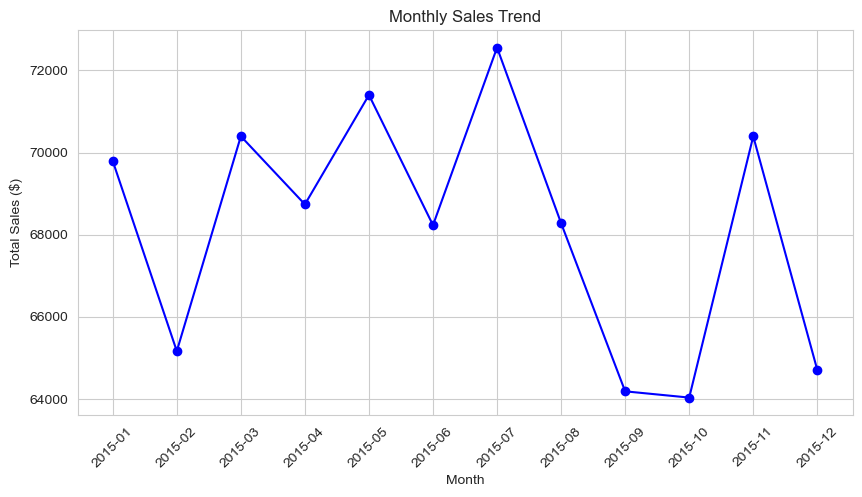

In [22]:
if "order_date" in df.columns and "total_price" in df.columns:
    monthly_sales = df.groupby(df["order_date"].dt.to_period("M"))["total_price"].sum()
    plt.figure(figsize=(10, 5))
    plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker="o", linestyle="-", color="b")
    plt.title("Monthly Sales Trend")
    plt.xlabel("Month")
    plt.ylabel("Total Sales ($)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

In [20]:
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")

